# Import Lib

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Exercise 1: Harris Corner Detection
* Load the image

* Convert the image to grayscale.

* Apply Harris Corner Detection.

* Visualize the corners on the image.



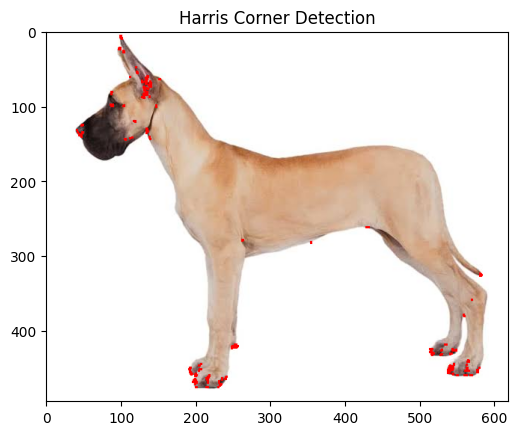

In [ ]:
# Load the image
img = cv2.imread('great-dane.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Harris Corner Detection
gray = np.float32(gray_image)
corners = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate the corners for better visibility
corners = cv2.dilate(corners, None)

# Mark corners on the original image
img[corners > 0.01 * corners.max()] = [0, 0, 255]

# Display the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.show()

# Exercise 2: HOG Feature Extraction

* Load the image.
* Convert the image to grayscale.
* Apply HOG descriptor to extract features.
* Visualize the gradient orientations.


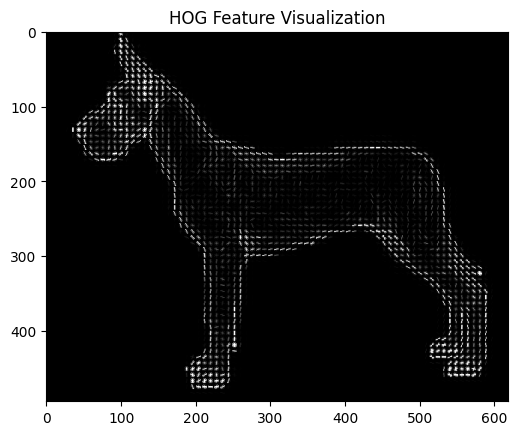

In [ ]:
# Load Image
img = cv2.imread('great-dane.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Compute HOG feature and visualize the gradient orientations
hog_fearture, hog_image = hog(gray_image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                              visualize=True, feature_vector=True)


# Rescale the intensity of the HOG image for visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the HOG image
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Feature Visualization')
plt.show()

# Exercise 3: FAST Keypoint Detection

* Load the image.
* Convert the image to grayscale.
* Apply FAST algorithm to detect keypoints.
* Visualize the keypoints.

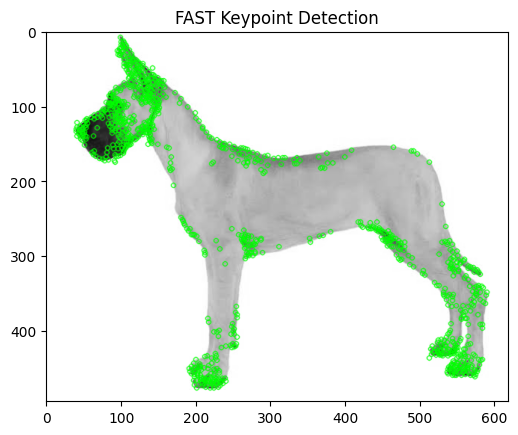

In [ ]:
img = cv2.imread('great-dane.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply FAST algorithm to detect keypoints
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(gray_image, None)

# Draw Keypoints on the image
img_keypoints = cv2.drawKeypoints(gray_image, keypoints, None, color=(0, 255, 0))

# Display the image with keypoints
plt.imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
plt.title('FAST Keypoint Detection')
plt.show()

# Exercise 4: Feature Matching using ORB and FLANN

* Load two images.
* Extract keypoints and descriptors using ORB.
* Match features between the two images using FLANN-based matcher.
* Display the matched features.

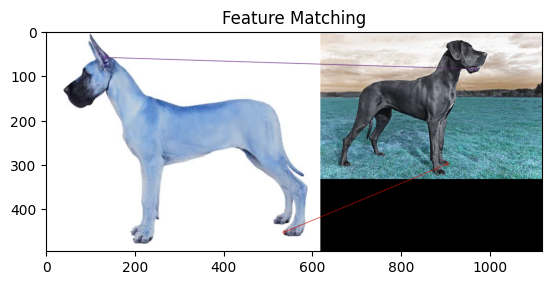

In [ ]:
# Load Image
img1 = cv2.imread('great-dane.png')
img2 = cv2.imread('great-dane-2.png')

# ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# FLANN based matcher
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match description
matches = flann.knnMatch(des1, des2, k=2)

# Apply ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)


# Draw the matches
result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)

# Display result
plt.imshow(result)
plt.title('Feature Matching')
plt.show()

# Exercise 5: Image Segmentation using Watershed Algorithm

* Load the image.
* Apply threshold to convert the image to binary.
* Apply Watershed algorithm to segment the image.
* Visualize the segmented regions.

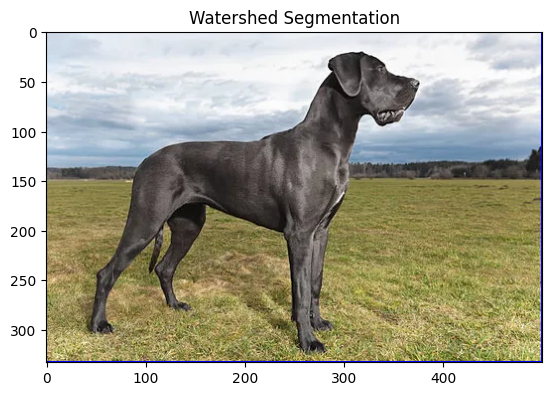

In [ ]:
# Load Image
img = cv2.imread('great-dane-2.png')
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply threshold to convert the image to binary
ret , binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1


# Mark the region Unknown
markers [unknown == 0] = 0

# Apply watershed algorithm
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

# Display the result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.show()
